In [1]:
import pandas as pd

In [7]:
file_path = '../book_example/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t') #read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옴.

print(chipo.shape) #행과 열의 크기 (4622개의 행과 5개의 피처)
print("===============")
print(chipo.info())#행의 구성 정보와 열의 구성 정보

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


null : 데이터가 비어있는 것. -> 결측값
3376 non-null object : 3376개의 비어있지 않은 문자열 데이터가 있음.
데이터의 총 갯수는 4622개 이므로 1246개의 결측값 존재

In [12]:
print(chipo.head(10))
print(chipo.columns)
print("=======================================================")
print(chipo.index)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### chipotle 데이터 셋 피처의 의미
+ order_id : 주문 번호
+ quantity : 아이템의 주문 수량
+ item_name : 주문한 아이템의 이름
+ choice_description : 주문한 아이템의 상세 선택 옵션
+ item_price : 주문 아이템의 가격 정보

### feature 형태의 종류
1. 수치형 피처
    + 연속형 피처 : 어떤 구간 안의 모든 값을 데이터로써 가질 수 있음. ex 키, 몸무게  
    + 비연속형 피처 : 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 함. ex 나이  
2. 범주형 피처  
    + 순서 있는 범주형 피처 : 순서가 있으나 수치는 아니다 ex. 학점(A,B,..F)  
    + 순서 없는 범주형 피처 : 데이터가 구분되면서도 순서가 없다 ex. 혈액형  
    
### quantity와 item_price의 수치적 특징
+ 연속형 피처이다.
+ quantity는 숫자지만, item_price는 object 타입이기 때문에 describe()함수로 기초 통계량 알 수 없다  
    -> 추가적인 데이터 전처리 작업이 필요하다
   

In [13]:
chipo['order_id'] = chipo['order_id'].astype(str) #id는 숫자의 의미가 아니기 때문에 str로 변환
print(chipo.describe()) #chipo 데이터 프레임에서 수치형 피처들의 기초 통계량 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [15]:
#범주형 피처는 unique() 함수 사용함.
print(len(chipo['order_id'].unique())) #order_id 개수 출력
print(len(chipo['item_name'].unique())) #item_name 개수 출력

1834
50


## 인사이트 발견 : 탐색과 시각화

1. 가장 많이 주문한 아이템 Top 10 분석하기
    + DataFrame['column']의 형태에 value_count() 함수를 적용하는 방식을 사용한다.  
    + DataFrame['column']은 시리즈라는 객체를 반환하는데, value_counts()함수는 오로지 이러한 시리즈 객체에만 적용되기 때문
2. 아이템 별 주문 개수와 총량
    + groupby() 함수 사용하여 아이템별 주문 개수와 총량구하기. 
    + pandas의 groupby 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성. 이를 통해 그룹별 연산 가능
3. 시각화
    + 아이쳄 주문의 총량을 막대 그래프로 시각화 하기
    + tolist(), arange() 사용하여 x_pos 선언

In [17]:
item_count = chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("TOP", idx, ":", val, cnt)

TOP 1 : Chicken Bowl 726
TOP 2 : Chicken Burrito 553
TOP 3 : Chips and Guacamole 479
TOP 4 : Steak Burrito 368
TOP 5 : Canned Soft Drink 301
TOP 6 : Steak Bowl 211
TOP 7 : Chips 211
TOP 8 : Bottled Water 162
TOP 9 : Chicken Soft Tacos 115
TOP 10 : Chips and Fresh Tomato Salsa 110


In [19]:
#아이템 별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count() #item_name을 그룹으로 order_id피처의 count()계산 
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [21]:
#아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum() #item_name을 그룹으로 quantity피처의 sum() 계산
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

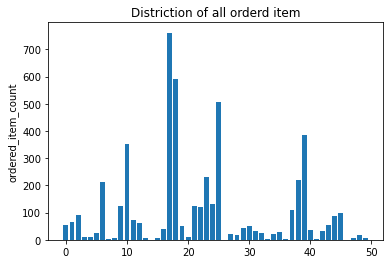

In [26]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distriction of all orderd item')

plt.show()

## 데이터 전처리 : 전처리 함수 사용하기
item_price는 문자열 타입이기 때문에 item_price 피처의 요약 통계 구할 수 없었음. 
+ apply()함수
    + 시리즈 단위의 연산을 처리하는 기능 수행.
    + sum()이나 mean()같이 연산이 정의된 함수를 파라미터로 받는다.  


In [35]:
#chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


## 탐색적 분석 : 스무고개로 개념적 탐색 분석하기
1. 주문당 평균 계산 금액 출력
2. 한 주문에 10달러 이상 지불한 주문 번호(id)출력
3. 각 아이템의 가격 구하기
4. 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
5. 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기
6. 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl'메뉴에 대한 총 주문 수량 구하기

In [43]:
tenDollar = chipo.groupby('order_id').sum() #item_name을 그룹으로 quantity피처의 sum() 계산
result = tenDollar[tenDollar['item_price']>=10]
print(result.index.values)

['1' '10' '100' ... '997' '998' '999']


In [46]:
eachItem = chipo.groupby('item_name').count()
print(eachItem)

                                       order_id  quantity  choice_description  \
item_name                                                                       
6 Pack Soft Drink                            54        54                  54   
Barbacoa Bowl                                66        66                  66   
Barbacoa Burrito                             91        91                  91   
Barbacoa Crispy Tacos                        11        11                  11   
Barbacoa Salad Bowl                          10        10                  10   
Barbacoa Soft Tacos                          25        25                  25   
Bottled Water                               162       162                   0   
Bowl                                          2         2                   2   
Burrito                                       6         6                   6   
Canned Soda                                 104       104                 104   
Canned Soft Drink           

In [53]:
highOrder = chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]
print(highOrder)

          quantity  item_price
order_id                      
926             23      205.25
1443            35      160.74
1483            14      139.00
691             11      118.25
1786            20      114.30
